<a href="https://colab.research.google.com/github/nabavi71/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [19]:
# load dataset

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [ ]:
xTrain.shape

In [20]:
# normalize the inputs from 0-255 to between0 and 1 by dividing by 255
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
xTrain = xTrain/255.0
xTest = xTest/255.0

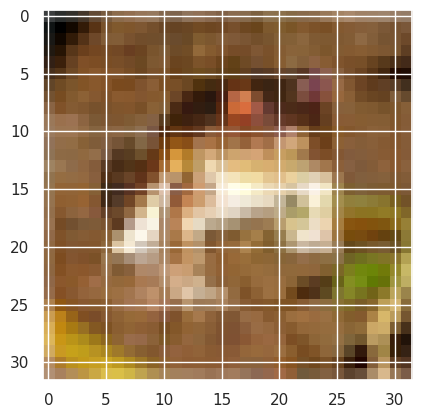

In [21]:
plt.imshow(xTrain[0])

In [21]:
# one-hot encode outputs
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [22]:
yTrain[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
num_class = yTrain.shape[1]
num_class

10

In [25]:
model = Sequential()

## Building The Model

In [26]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=xTrain.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization()) 

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

## Training The Model

In [29]:
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), validation_freq=1, epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 24s 14ms/step - loss: 1.5815 - accuracy: 0.4321 - val_loss: 1.3164 - val_accuracy: 0.5422
Epoch 2/30
782/782 [==============================] - 11s 14ms/step - loss: 1.1631 - accuracy: 0.5867 - val_loss: 0.9292 - val_accuracy: 0.6743
Epoch 3/30
782/782 [==============================] - 12s 15ms/step - loss: 0.9989 - accuracy: 0.6500 - val_loss: 0.8796 - val_accuracy: 0.6965
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8997 - accuracy: 0.6844 - val_loss: 0.7790 - val_accuracy: 0.7266
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8398 - accuracy: 0.7056 - val_loss: 0.6929 - val_accuracy: 0.7575
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7909 - accuracy: 0.7238 - val_loss: 0.6790 - val_accuracy: 0.7664
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7555 - accuracy: 0.7369 - val_loss: 0.6650 - val_accuracy:

In [31]:
for key, val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


<Axes: >

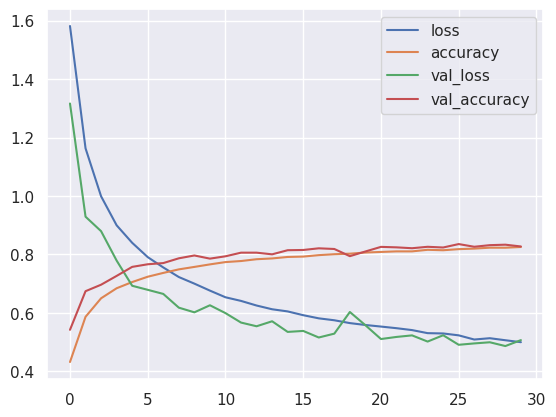

In [32]:
pd.DataFrame(history.history).plot()

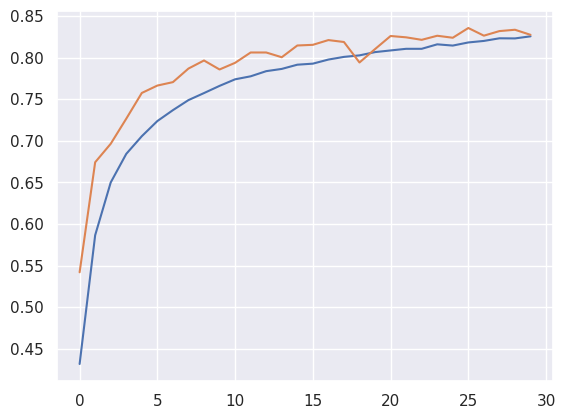

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [34]:
model.save('CNN_cifar10.h5')

In [6]:
model2 = load_model('/content/drive/MyDrive/testProjects/CNN_cifar10.h5')

In [23]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
model2.predict(xTest[0:10])[0]

1/1 [==============================] - 0s 342ms/step


array([2.5775856e-03, 1.6428567e-04, 5.2146856e-03, 4.7312942e-01,
       7.6795381e-04, 5.1306677e-01, 3.4150474e-03, 1.4923456e-03,
       1.2939783e-04, 4.2534481e-05], dtype=float32)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [10]:
import seaborn as sns; sns.set()

313/313 [==============================] - 19s 59ms/step


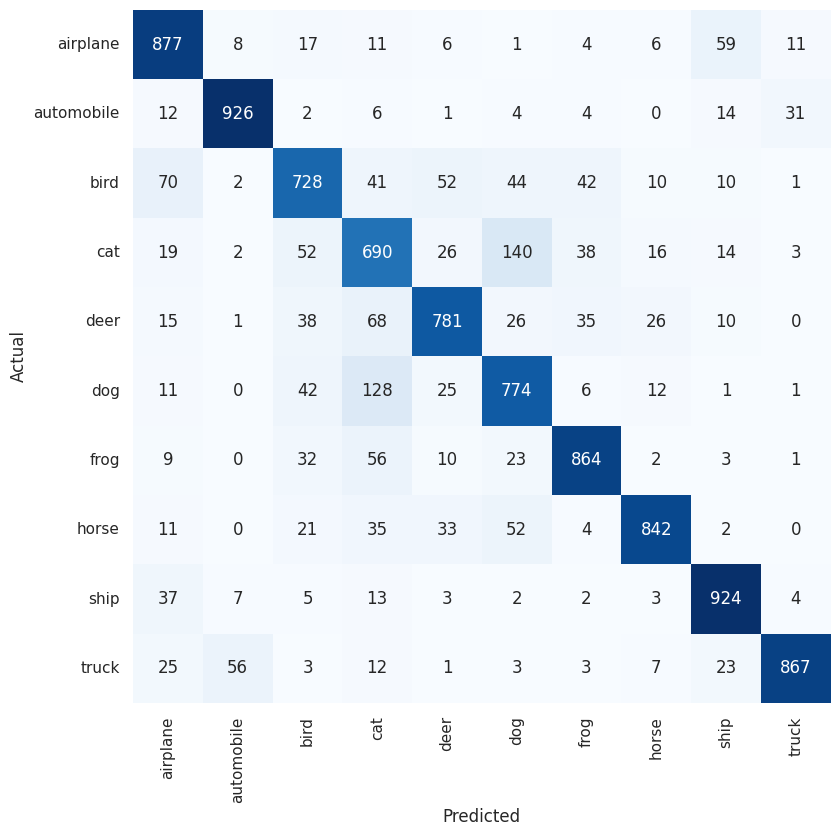

In [12]:
#prediction the test data
predictions = model2.predict(xTest)
predictions = np.argmax(predictions, axis=1)

#creating confusion matrix
cm = confusion_matrix(yTest, predictions)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, cbar = False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()